# Cool-Flame Chemistry:
## Two-stage ignition in a zero-dimensional reactor

This model uses a standard, zero-dimensional constant-pressure reactor to illustrate
 multi-stage combustion and *negative temperature dependent* ignition delay time behavior
 for *n*-heptane, as might be observed in a shock tube.

In [1]:
import os.path
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

import userdefined as ud

In [2]:
# we'll use a reduced gasoline mechanism from Lawrence Livermore National Lab (LLNL)
mech_file = os.path.abspath('../mechanisms/LLNL_gasoline_red323.cti')

gas = ct.Solution(mech_file)
print(f'LLNL reduced gasoline mechanism: \t{gas.n_species:3.0f} Species\t{gas.n_reactions} Reactions')

LLNL reduced gasoline mechanism: 	312 Species	2469 Reactions


In [3]:
# define the starting reactor conditions
fuel = {'NC7H16':1}
ox = {'O2':0.21, 'N2':0.79}
phi = 1
P = 10 * ct.one_atm
spoi = ['NC7H16', 'O2', 'H2O', 'CO2', 'CO', 'CH2O', 'HO2', 'OH', 'H', 'H2', 'C7H15O2-1', 'C7H15O2-2', 'C7H15O2-3', 'H2O2']
idt_defs = {'max':('HO2', 'H2O2', 'C7H15O2-1', 'C7H15O2-2', 'C7H15O2-3'),
            'rise':('H2O', 'CO2', 'T', 'OH', 'H',),
            'fall':('NC7H16',)}

# define a wide range of temperatures, suffiently long simulation time to see ignition
Ts = np.arange(600, 1101, 25)
t_stop = 2e-1

In [4]:
# run an initial simulation with 2-stage ignition
T = 750

results = ud.run_simulation(gas, T=T, P=P, phi=phi, f=fuel, ox=ox, t_stop=t_stop,
                            species_of_interest=spoi)
ud.calculate_idt(results, max_value=idt_defs['max'], max_rise=idt_defs['rise'], max_fall=idt_defs['fall'])

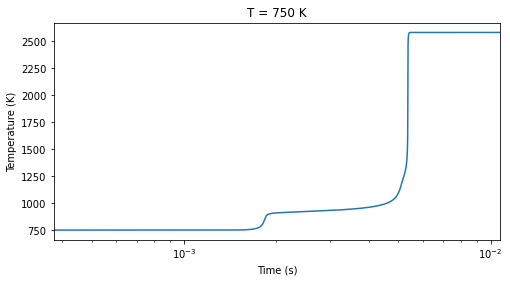

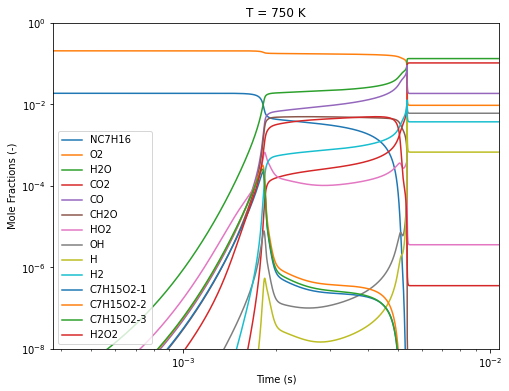

In [5]:
# Let's view the full spaghetti monster first, then break it down...
ud.plot_simulation_result(results, tmin=results['idt']['T']*7e-2,
                       tmax=results['idt']['T']*2, ylim_x=(1e-8, 1),
                       title=f'T = {T:3.0f} K')

The temperature rises a small amount to a first plateau at about 1.8 ms (first-stage "cool" igntion),
 then rises at about 5.3 ms to the adiabatic flame temperature (second-stage "hot" ignition).

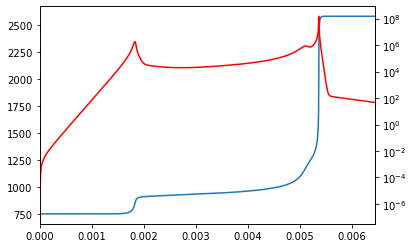

In [6]:
#   temperature
plt.figure()
plt.plot(results['time'], results['T'])
plt.xlim((0, results['idt']['T']*1.2))
#   dT/dt
dTdt = np.diff(results['T']) / np.diff(results['time'])
plt.twinx()
mean_ts = np.array(results['time'][:-1]) + np.diff(results['time'])
plt.semilogy(mean_ts, dTdt, '-r')

The mole fractions of some species (e.g. n-C7H16, H2O, CO2) change monotonically, with the largest
 changes occurring during the ignition events.

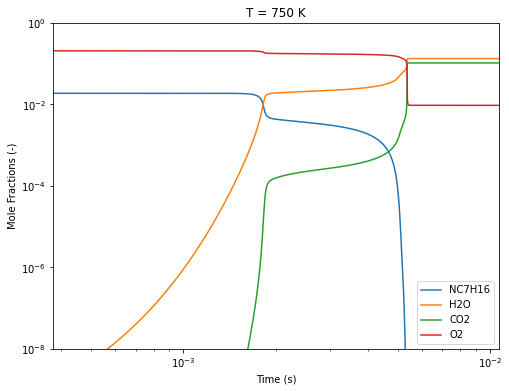

In [7]:
#   species
ud.plot_species_result(results, tmin=results['idt']['T']*7e-2,
                       tmax=results['idt']['T']*2, ylim_x=(1e-8, 1),
                       title=f'T = {T:3.0f} K', species=['NC7H16', 'H2O', 'CO2', 'O2'])

Other species (e.g. H2O2, CH2O) exist in large quantities only between first- and second-stage ignition.

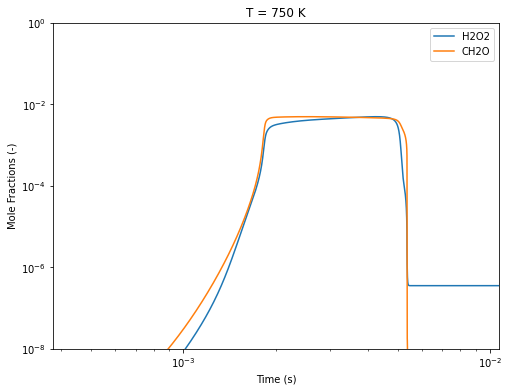

In [8]:
#   species
ud.plot_species_result(results, tmin=results['idt']['T']*7e-2,
                       tmax=results['idt']['T']*2, ylim_x=(1e-8, 1),
                       title=f'T = {T:3.0f} K', species=['H2O2', 'CH2O'])

Still, others (e.g. HO2, C7H15O2-1 (an example of an 'RO2' species), OH, H) peak during the ignition
 events, sometimes displaying large equilibrium concentrations following second-stage igntion.

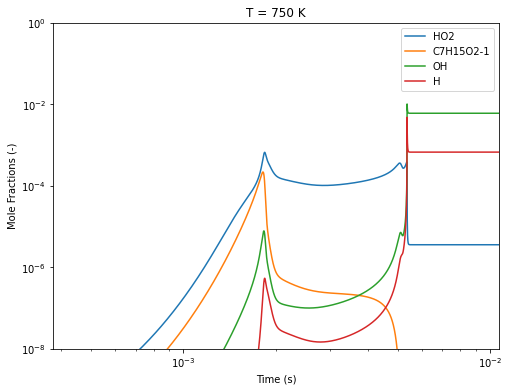

In [9]:
#   species subset
ud.plot_species_result(results, tmin=results['idt']['T']*7e-2,
                       tmax=results['idt']['T']*2, ylim_x=(1e-8, 1),
                       title=f'T = {T:3.0f} K', species=['HO2', 'C7H15O2-1', 'OH', 'H'])

From these observations, we may infer that different definitions of the ignition delay time
 may allow us to decipher first- and second- stage igntion events.

For example, the peak rate of temperature rise may allow us to identify the second stage,
 whereas the time of peak C7H15O2-1 concentration may be a marker the first stage.

Current Simulation: T = 600 K
Current Simulation: T = 625 K
Current Simulation: T = 650 K
Current Simulation: T = 675 K
Current Simulation: T = 700 K
Current Simulation: T = 725 K
Current Simulation: T = 750 K
Current Simulation: T = 775 K
Current Simulation: T = 800 K
Current Simulation: T = 825 K
Current Simulation: T = 850 K
Current Simulation: T = 875 K
Current Simulation: T = 900 K
Current Simulation: T = 925 K
Current Simulation: T = 950 K
Current Simulation: T = 975 K
Current Simulation: T = 1000 K
Current Simulation: T = 1025 K
Current Simulation: T = 1050 K
Current Simulation: T = 1075 K
Current Simulation: T = 1100 K


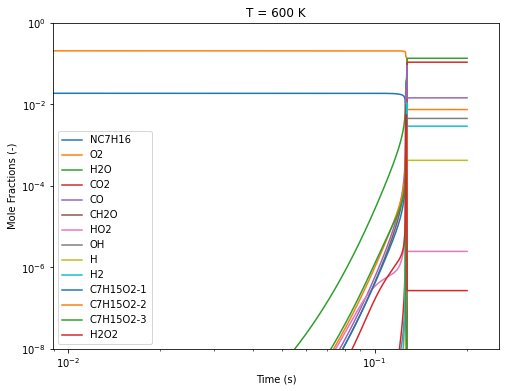

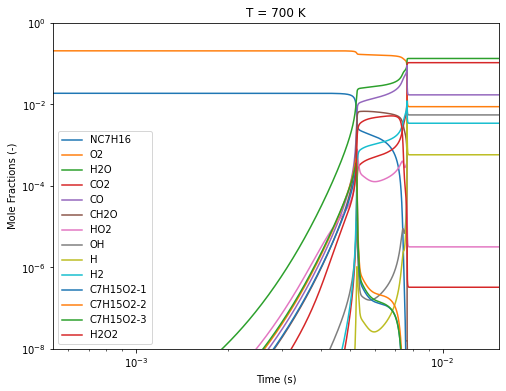

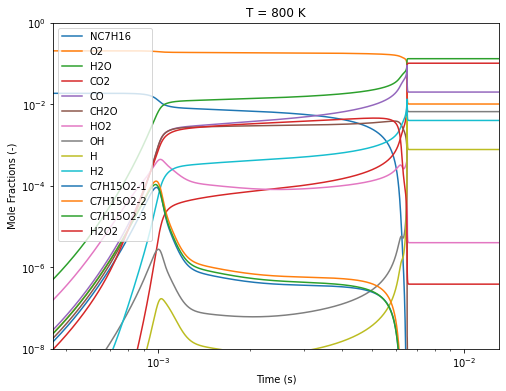

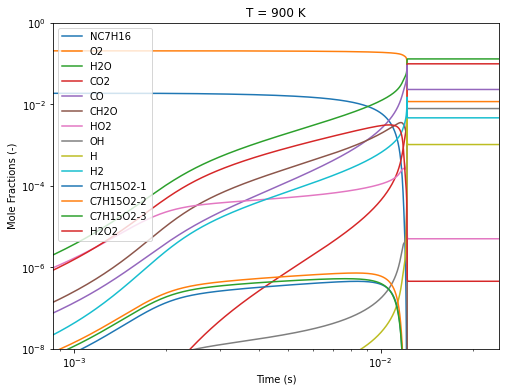

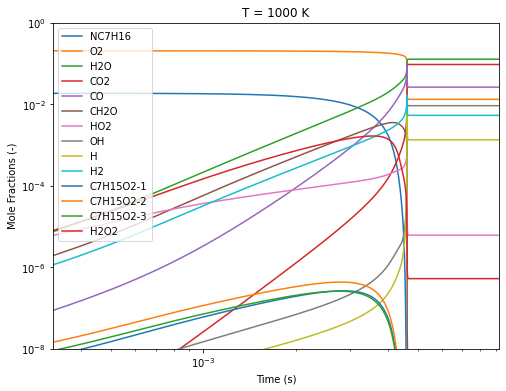

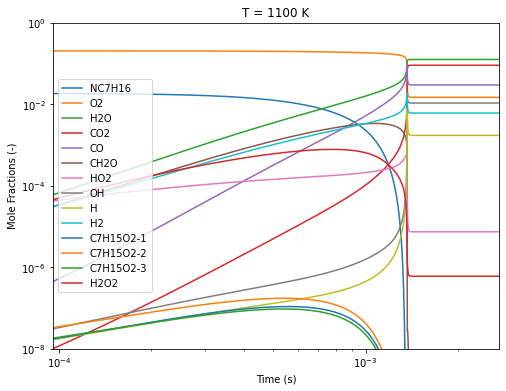

In [10]:
# now run all the temperatures, saving just the IDTs to a list
idt_results = []

# you can change the condition on the "plot_species..." call in this function to see results for
#  each simulation run at the expense of extra run time
for T in Ts:
    print(f'Current Simulation: T = {T:3.0f} K')
    result = ud.run_simulation(gas, T=T, P=P, phi=phi, f=fuel, ox=ox, t_stop=t_stop,
                               species_of_interest=spoi)
    ud.calculate_idt(result, max_value=['C7H15O2-1'], max_rise=['T'])
    if T % 100 == 0:
        ud.plot_species_result(result, tmin=result['idt']['T']*7e-2,
                               tmax=result['idt']['T']*2, ylim_x=(1e-8, 1),
                               title=f'T = {T:3.0f} K')
    idt_results += [result['idt']]

And now we can plot our IDT results to see how they look:

Text(0, 0.5, 'Ignition Delay Time (ms)')

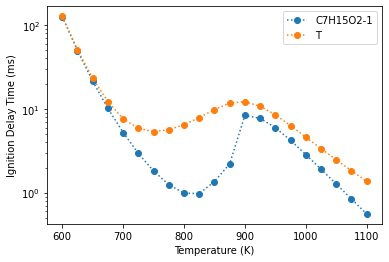

In [11]:
for key in idt_results[0]:
    idts = [res[key]*1e3 for res in idt_results]
    plt.semilogy(Ts, idts, 'o:', label=str(key))
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Ignition Delay Time (ms)')

And there you have it! From these results, you can see:
* the temperature-based igntion delay time is consistently longer
* both times show regions of "negative temperature dependence", with IDT increasing with temperature
* in the region 700~875 K, the two measures show significant separation in time, indicating distinct
 ignition events

